# Visualizing V(D)J data

## Integration with `scanpy`
Now that we have both 1) a pre-processed V(D)J data in `Dandelion` object and 2) matching `AnnData` object, we can start finding clones and *'integrate'* the results. All the V(D)J (AIRR) analyses files can be saved as *.tsv* format so that it can be used in other tools like *immcantation*, *immunoarch*, *vdjtools*, etc.

The results can also be ported into the `AnnData` object for access to more plotting functions provided through `scanpy` [[Wolf2018]](https://doi.org/10.1186/s13059-017-1382-0).

<b>Import modules</b>

In [1]:
import os
import pandas as pd
import dandelion as ddl

ddl.logging.print_header()


dandelion==0.3.3.dev29 pandas==2.0.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


In [2]:
# change directory to somewhere more workable
os.chdir(os.path.expanduser("~/Downloads/dandelion_tutorial/"))
# I'm importing scanpy here to make use of its logging module.
import scanpy as sc

sc.settings.verbosity = 3
import warnings

warnings.filterwarnings("ignore")
sc.logging.print_header()


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


<b>Read in the previously saved files</b>

I will work with the same example from the previous section since I have the `AnnData` object saved and vdj table filtered.

In [3]:
adata = sc.read_h5ad("adata.h5ad")


In [4]:
vdj = ddl.read_h5ddl("dandelion_results.h5ddl")
vdj


Dandelion class object with n_obs = 2238 and n_contigs = 7357
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

### `tl.transfer`

To proceed, we first need to initialise the `AnnData` object with our network. This is done by using the tool function `tl.transfer`.

In [5]:
ddl.tl.transfer(adata, vdj)  # this will include singletons.
adata


Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:07)


AnnData object with n_obs × n_vars = 23603 × 1400
    obs: 'sampleid', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_sta

To show only expanded clones, specify `expanded_only=True`

In [6]:
adata2 = adata.copy()
ddl.tl.transfer(adata2, vdj, expanded_only=True)
adata2


Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:06)


AnnData object with n_obs × n_vars = 23603 × 1400
    obs: 'sampleid', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_sta

<div class="alert alert-info">

Note
    
If a column with the same name between `Dandelion.metadata` and `AnnData.obs` already exists, `tl.transfer` will not overwrite the column in the `AnnData` object. This can be toggled to overwrite all with `overwrite=True` or `overwrite=["column_name1", "column_name2"]` if only some columns are to be overwritten.

</div>

You can see that `AnnData` object now contains a couple more columns in the `.obs` slot, corresponding to the metadata that is returned after `tl.generate_network`, and newly populated `.obsm` and `.obsp` slots. The original RNA connectivities and distances are now added into the `.obsp` slot as well.

## Plotting in `scanpy`

### `pl.clone_network`

So now, basically we can plot in `scanpy` with their plotting modules. I've included a plotting function in <b>dandelion</b>, `pl.clone_network`, which is really just a wrapper of their `pl.embedding` module.

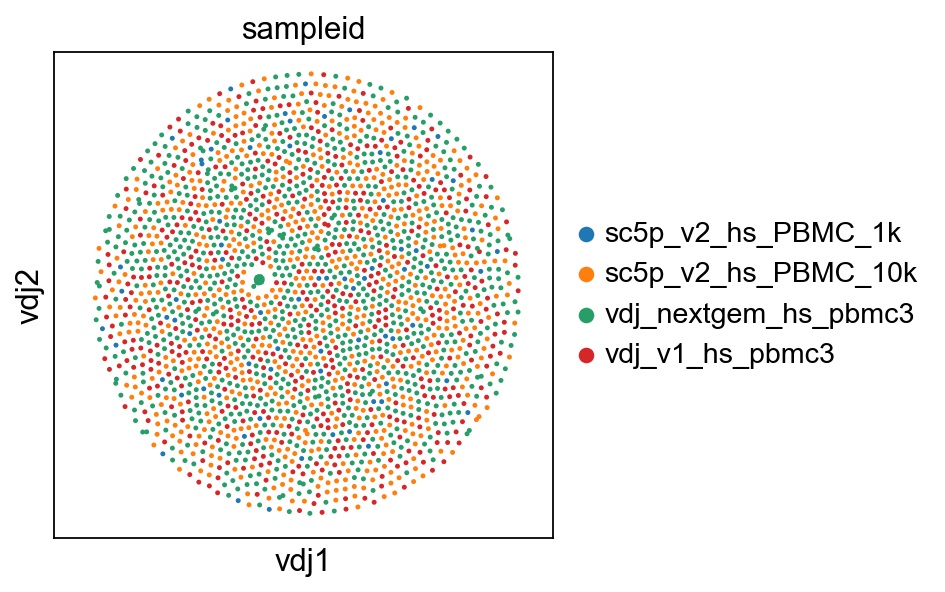

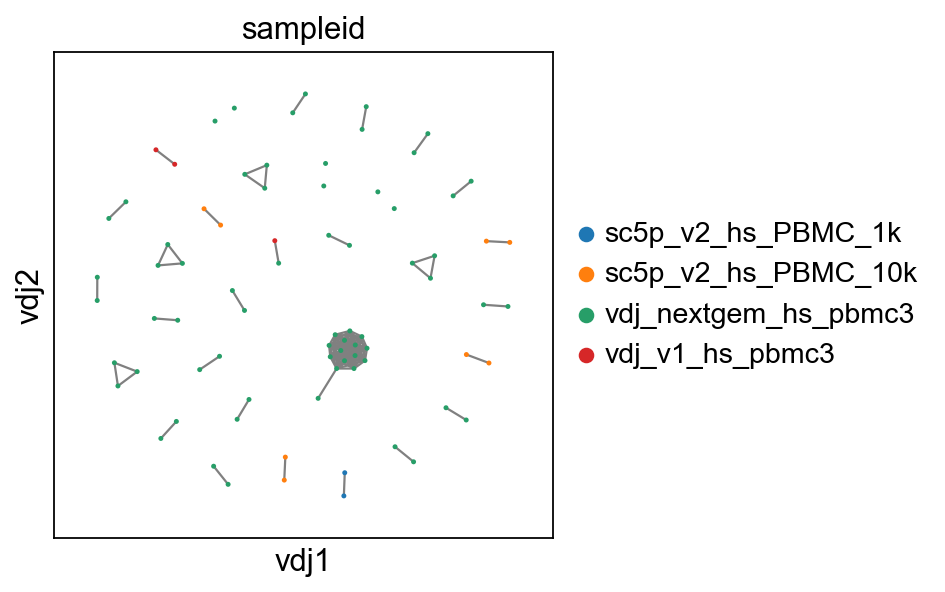

In [7]:
sc.set_figure_params(figsize=[4, 4])
ddl.pl.clone_network(adata, color=["sampleid"], edges_width=1, size=20)
# show where clones/clonotypes have more than 1 cell
ddl.pl.clone_network(adata2, color=["sampleid"], edges_width=1, size=20)


<div class="alert alert-info">

Note

if you prefer the original (modified) Fruchterman-Reingold layout, you can generate the layout with `layout_method="mod_fr"`. Just note that this is significantly slower. Although the `X` and `Y` axes (`vdj1` and `vdj2`) are arbitrary, the `mod_fr` layout seems to produce more pronounced repulsion between clusters, so something to keep in mind for when trying to work with a lot of cells/clusters.
    
</div>

Generating network


Setting up data: 4501it [00:00, 8830.12it/s]
Linking edges : 100%|██████████| 2031/2031 [00:00<00:00, 101282.06it/s]                                                                                   

generating network layout


 finished: Updated Dandelion object: 
   'data', contig-indexed clone table
   'metadata', cell-indexed clone table
   'layout', graph layout
   'graph', network constructed from distance matrices of VDJ- and VJ- chains (0:00:08)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:07)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:07)


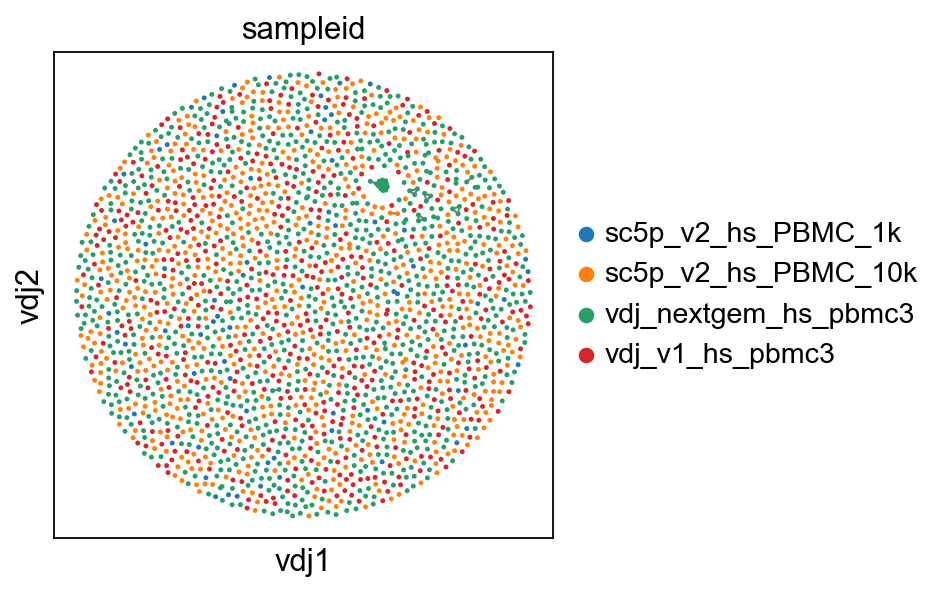

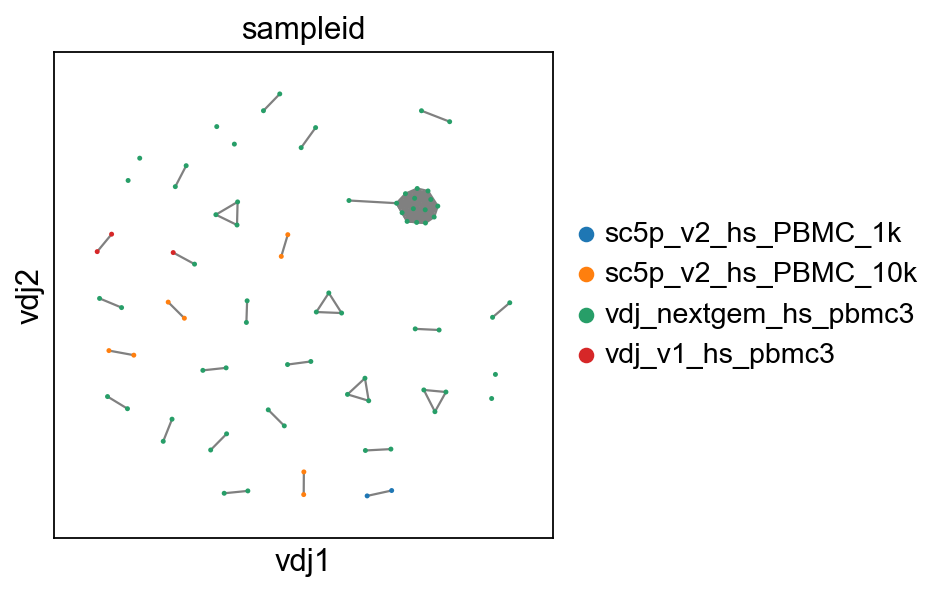

In [8]:
# making a copy of both adata and vdj
vdj3 = vdj.copy()
adata3 = adata.copy()
# recompute layout with original method
ddl.tl.generate_network(vdj3, layout_method="mod_fr")
ddl.tl.transfer(adata3, vdj3)
# also for > 1 cells
adata4 = adata3.copy()
ddl.tl.transfer(adata4, vdj3, expanded_only=True)
# visualise
ddl.pl.clone_network(adata3, color=["sampleid"], edges_width=1, size=20)
# show where clones/clonotypes have more than 1 cell
ddl.pl.clone_network(adata4, color=["sampleid"], edges_width=1, size=20)


### `tl.extract_edge_weights`

<b>dandelion</b> provides an edge weight extractor tool `tl.extract_edge_weights` to retrieve the edge weights that can be used to specify the edge widths according to weight/distance.

Generating network


Setting up data: 4501it [00:00, 8274.67it/s]
Linking edges : 100%|██████████| 2031/2031 [00:00<00:00, 96645.58it/s]                                                                                    

generating network layout


 finished: Updated Dandelion object: 
   'data', contig-indexed clone table
   'metadata', cell-indexed clone table
   'layout', graph layout
   'graph', network constructed from distance matrices of VDJ- and VJ- chains (0:00:11)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:07)


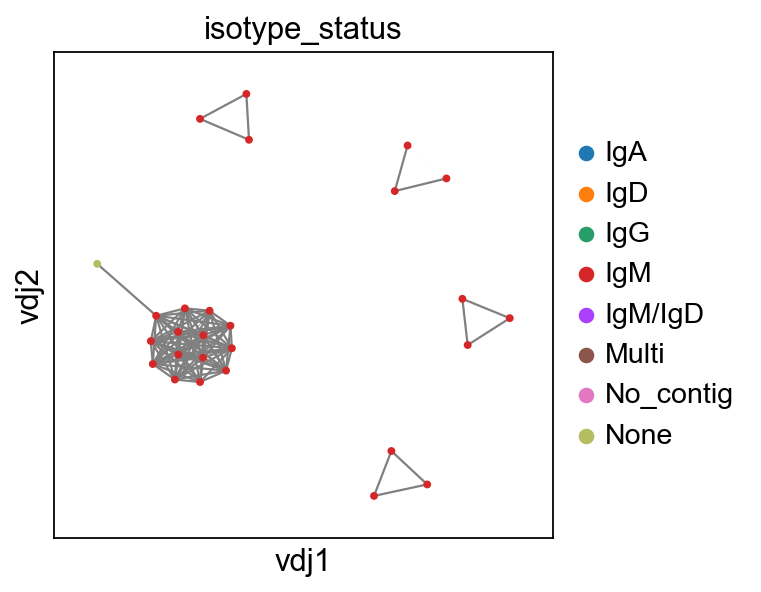

In [9]:
# To illustrate this, first recompute the graph by specifying a minimum size
vdjx = vdj.copy()
adatax = adata.copy()
ddl.tl.generate_network(
    vdjx, min_size=3
)  # second graph will only contain clones/clonotypes with >= 3 cells
ddl.tl.transfer(adatax, vdjx, expanded_only=True)

edgeweights = [
    1 / (e + 1) for e in ddl.tl.extract_edge_weights(vdjx)
]  # invert and add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge
# therefore, the thicker the line, the shorter the edit distance.
ddl.pl.clone_network(
    adatax,
    color=["isotype_status"],
    legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,
)


`None` here means there is no isotype information i.e. no `c_call`. If `No_contig` appears, it means there's no V(D)J information.

You can interact with `pl.clone_network` just as how you interact with the rest of the scatterplot modules in `scanpy`.

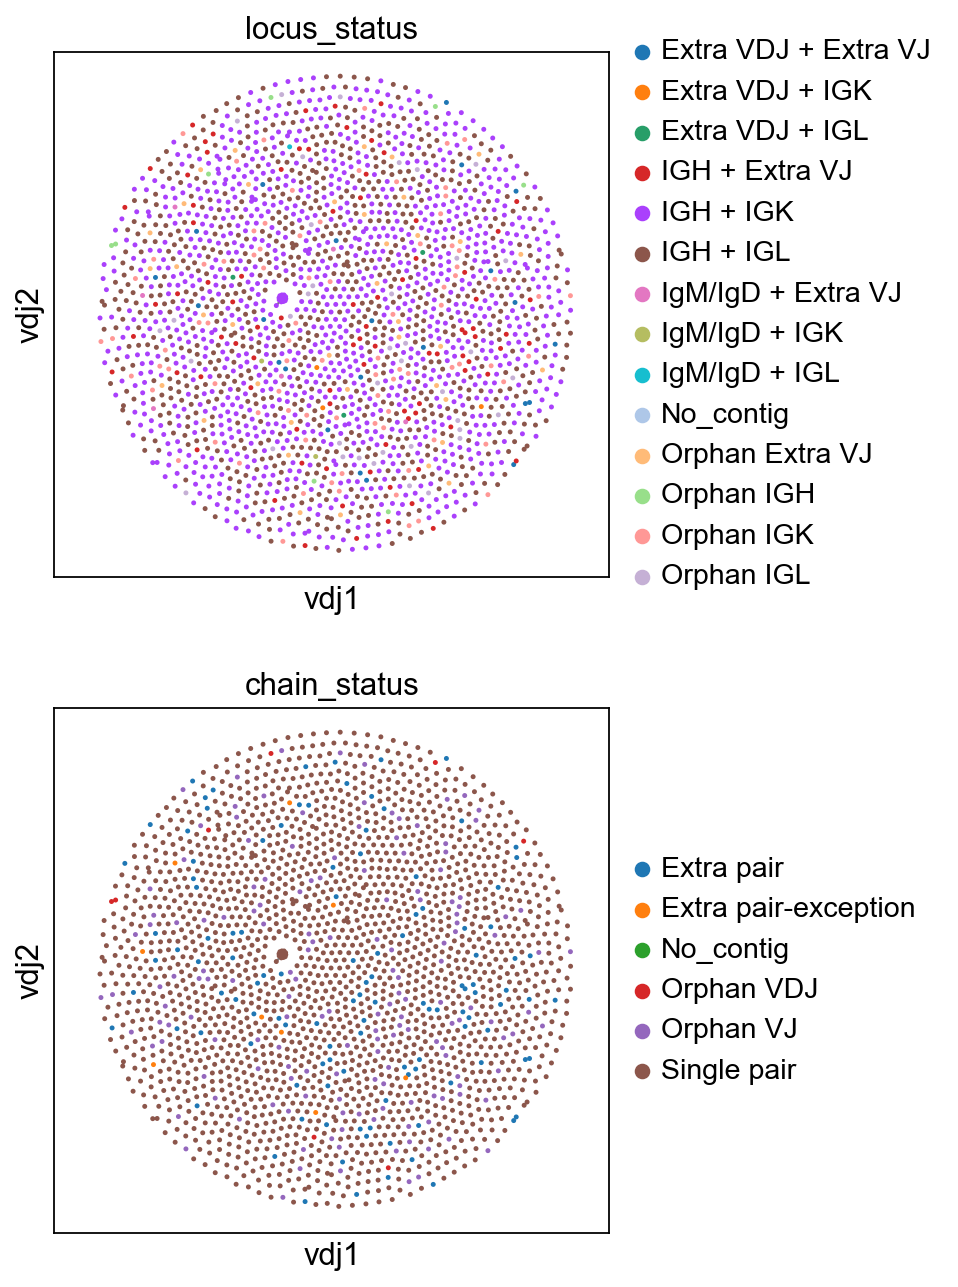

In [10]:
sc.set_figure_params(figsize=[4, 4.5])
ddl.pl.clone_network(
    adata,
    color=["locus_status", "chain_status"],
    ncols=1,
    legend_fontoutline=3,
    edges_width=1,
    size=20,
)


you should be able to save the adata object and interact with it as per normal.

In [11]:
adata.write("adata.h5ad", compression="gzip")


## Calculating size of clones

### `tl.clone_size`

Sometimes it's useful to evaluate the size of the clone. Here `tl.quantify_clone_size` does a simple calculation to enable that.

In [12]:
ddl.tl.clone_size(vdj)
ddl.tl.transfer(adata, vdj)


Quantifying clone sizes
 finished: Updated Dandelion object: 
   'metadata', cell-indexed clone table (0:00:00)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:07)


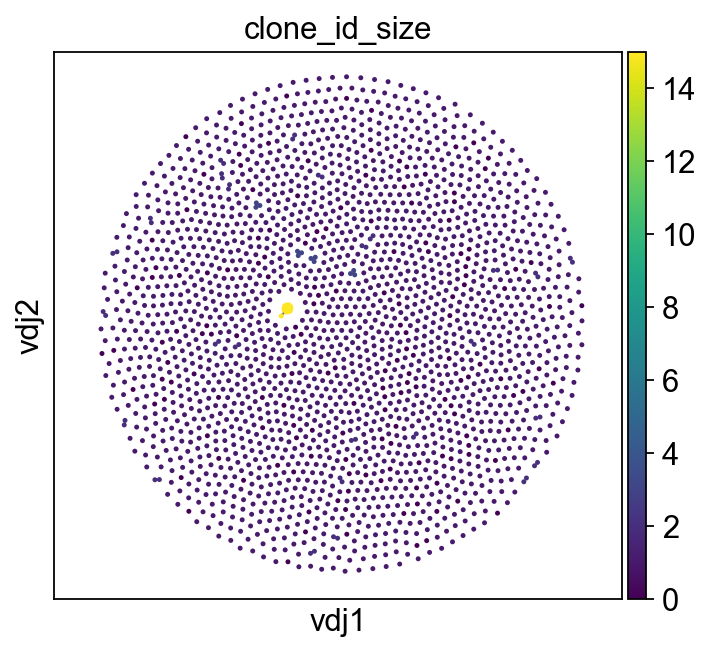

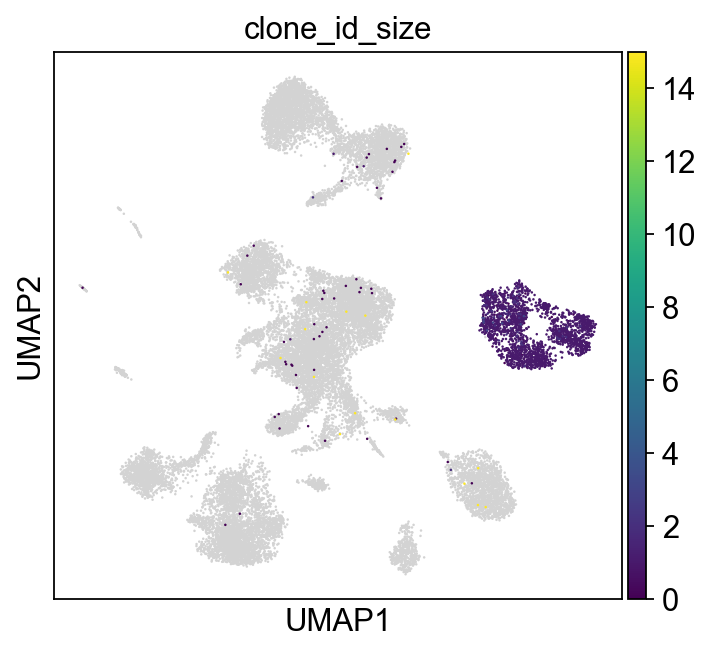

In [13]:
sc.set_figure_params(figsize=[5, 4.5])
ddl.pl.clone_network(
    adata,
    color=["clone_id_size"],
    legend_fontoutline=3,
    edges_width=1,
    size=20,
    color_map="viridis",
)
sc.pl.umap(adata, color=["clone_id_size"], color_map="viridis")


You can also specify `max_size` to clip off the calculation at a fixed value.

In [14]:
ddl.tl.clone_size(vdj, max_size=3)
ddl.tl.transfer(adata, vdj)


Quantifying clone sizes
 finished: Updated Dandelion object: 
   'metadata', cell-indexed clone table (0:00:00)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:06)


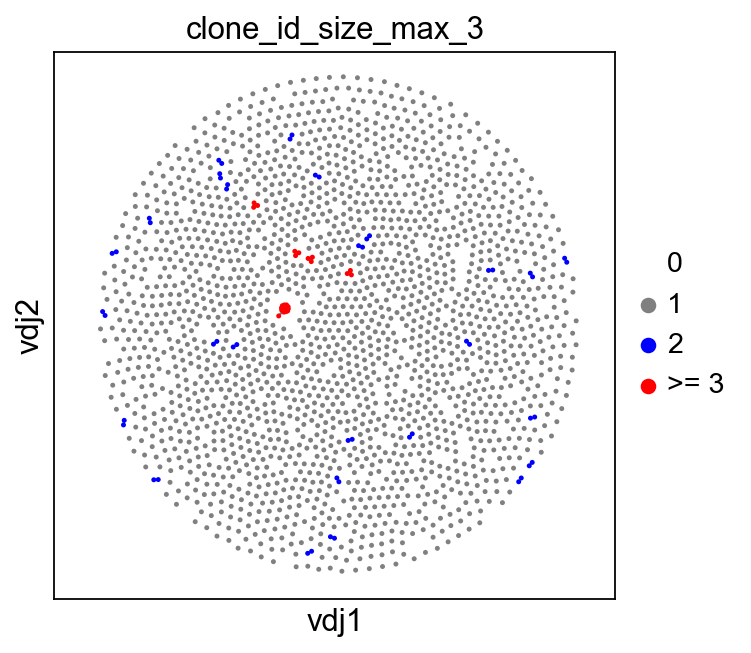

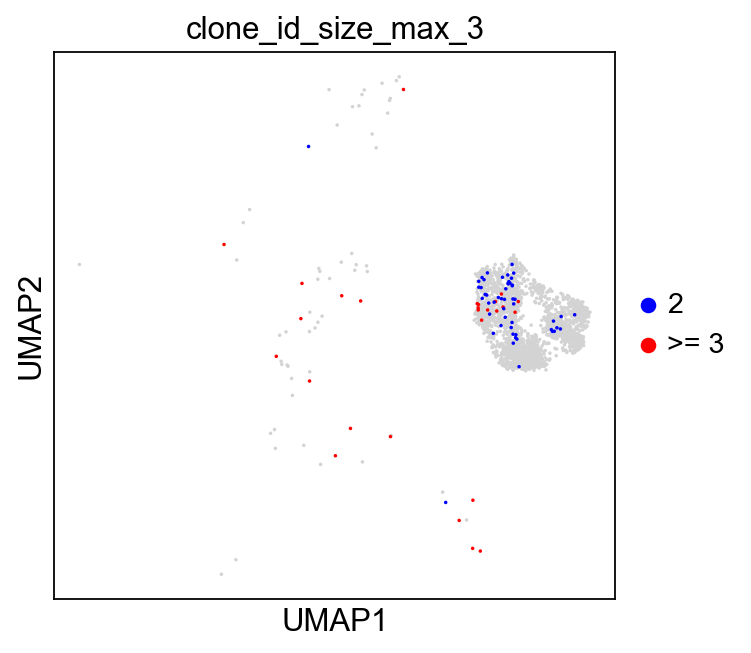

In [15]:
sc.set_figure_params(figsize=[4.5, 4.5])
ddl.pl.clone_network(
    adata,
    color=["clone_id_size_max_3"],
    ncols=2,
    legend_fontoutline=3,
    edges_width=1,
    palette=["white", "grey", "blue", "red"],
    size=20,
    na_in_legend=False,
)
sc.pl.umap(
    adata[adata.obs["has_contig"] == "True"],
    color=["clone_id_size_max_3"],
    groups=["2", ">= 3"],
    size=10,
    na_in_legend=False,
)


## Additional plotting functions

### `ddl.pl.barplot`
`pl.barplot` is a generic barplot function that will plot items in the metadata slot as a bar plot. This function will also interact with `.obs` slot if a `scanpy` object is used in place of `Dandelion` object. However, if your `scanpy` object holds a lot of non-B cells, then the plotting will be just be saturated with nan values.

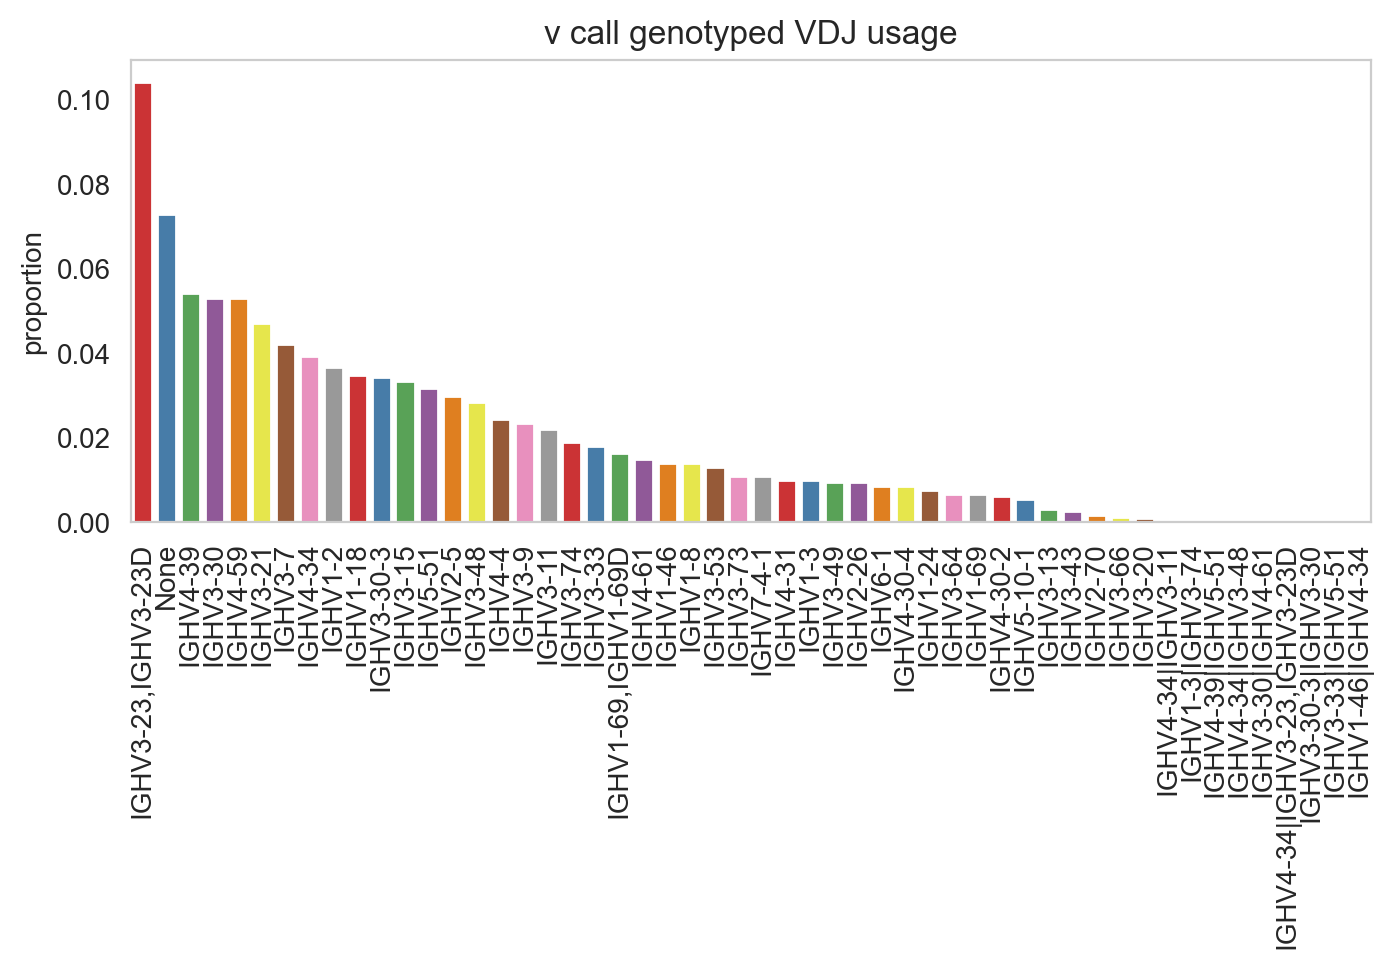

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)

fig, ax = ddl.pl.barplot(
    vdj[vdj.metadata.isotype_status != "Multi"],  # remove multi from the plots
    color="v_call_genotyped_VDJ",
)
plt.show()


You can prevent it from sorting by specifying `sort_descending = None`. Colours can be changed with `palette` option.

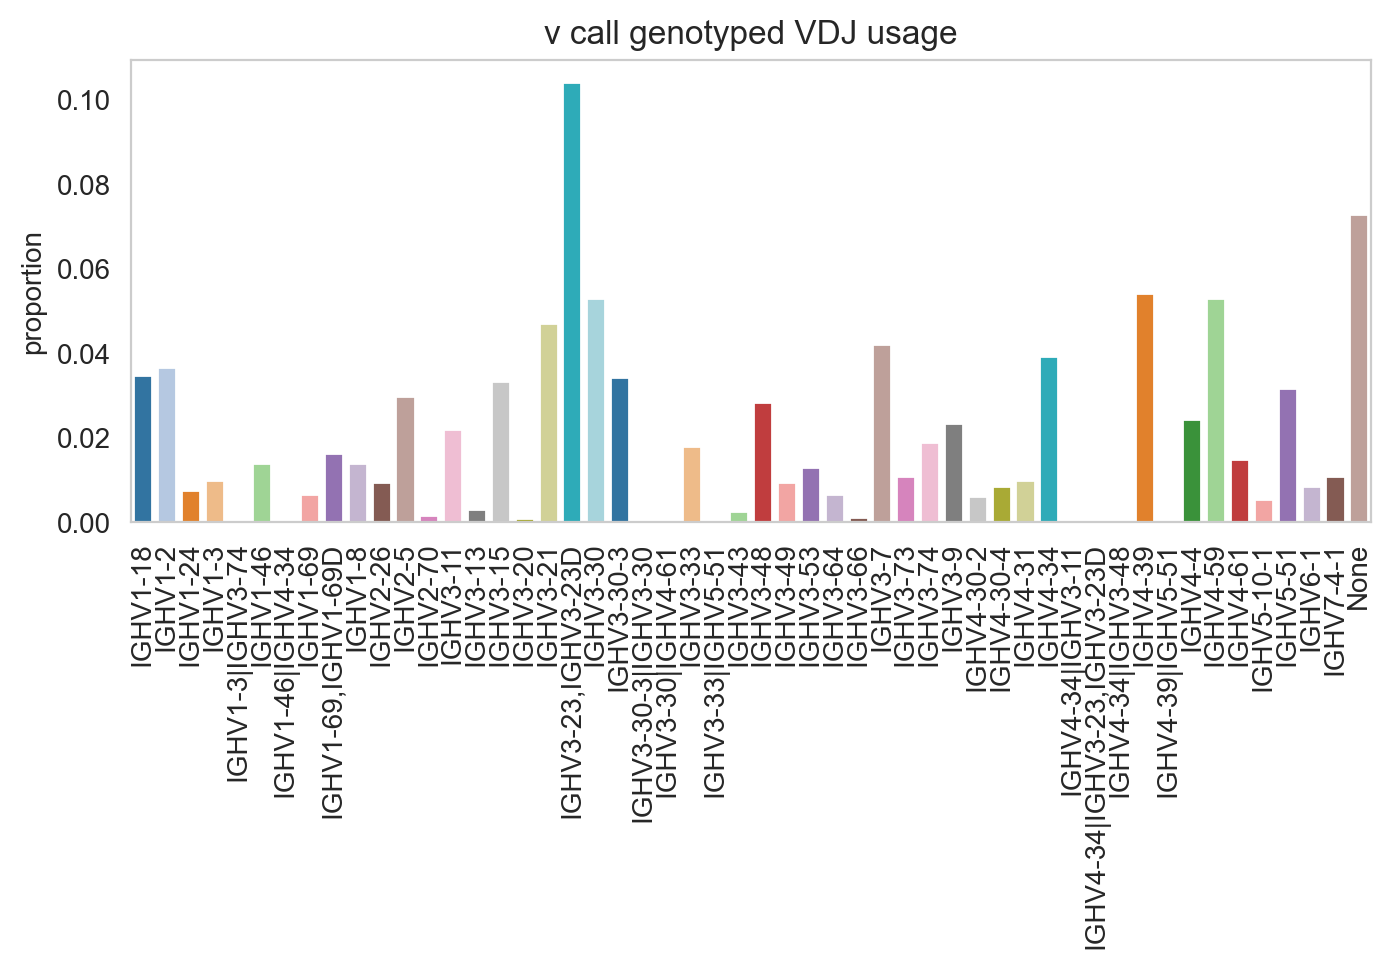

In [17]:
fig, ax = ddl.pl.barplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="v_call_genotyped_VDJ",
    sort_descending=None,
    palette="tab20",
)
plt.show()


Specifying `normalize = False` will change the y-axis to counts.

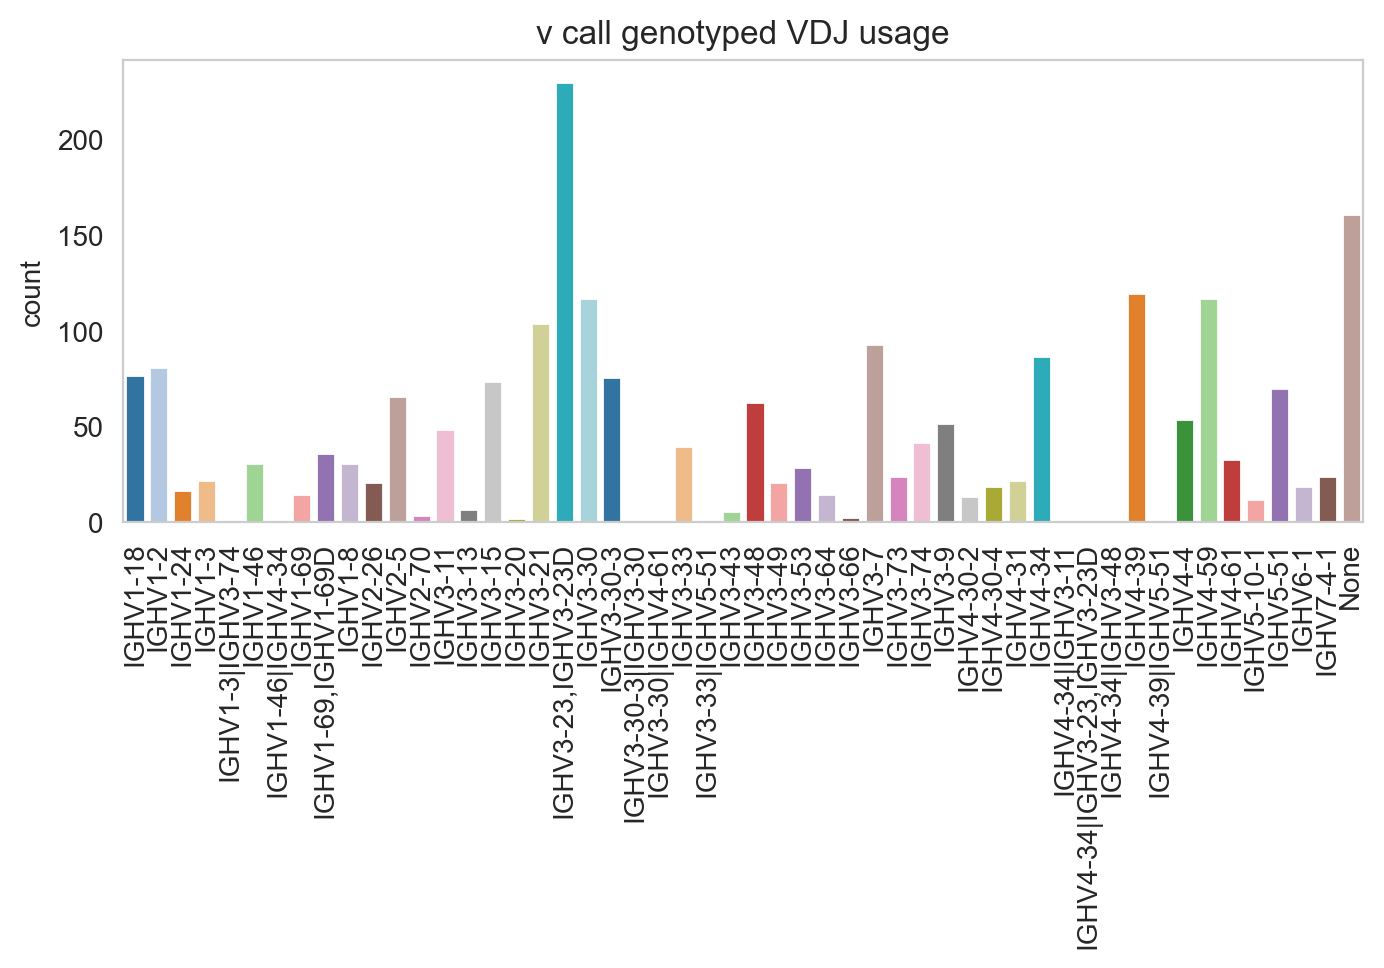

In [18]:
fig, ax = ddl.pl.barplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="v_call_genotyped_VDJ",
    normalize=False,
    sort_descending=None,
    palette="tab20",
)
plt.show()

### `pl.stackedbarplot`
`pl.stackedbarplot` is similar to above but can split between specified groups. Some examples below:

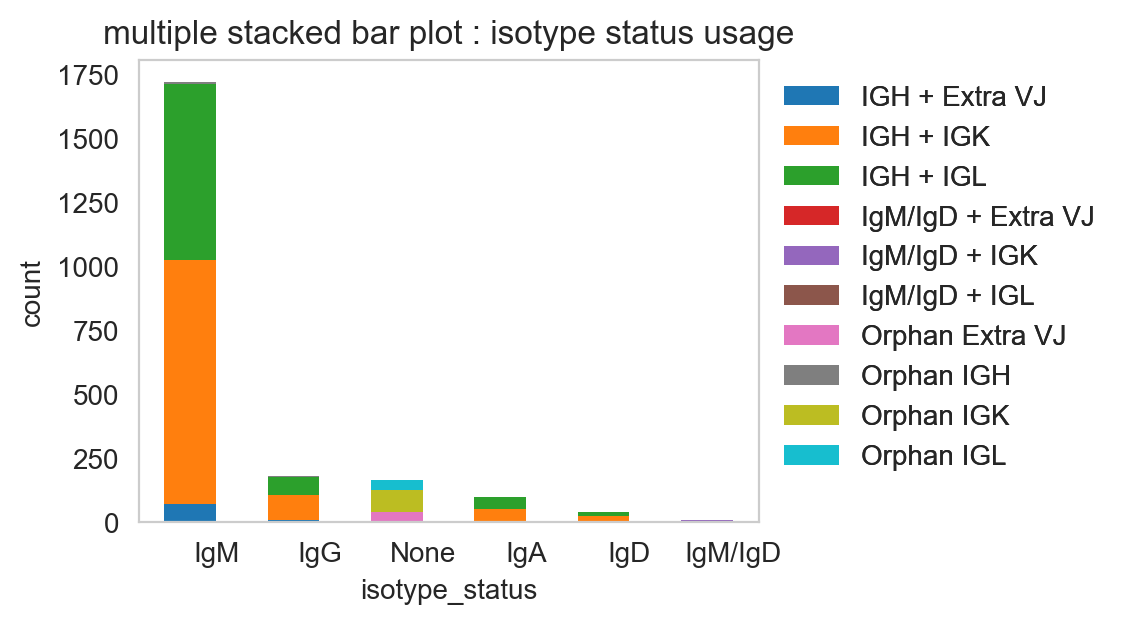

In [19]:
fig, ax = ddl.pl.stackedbarplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="isotype_status",
    groupby="locus_status",
    xtick_rotation=0,
    figsize=(4, 3),
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()


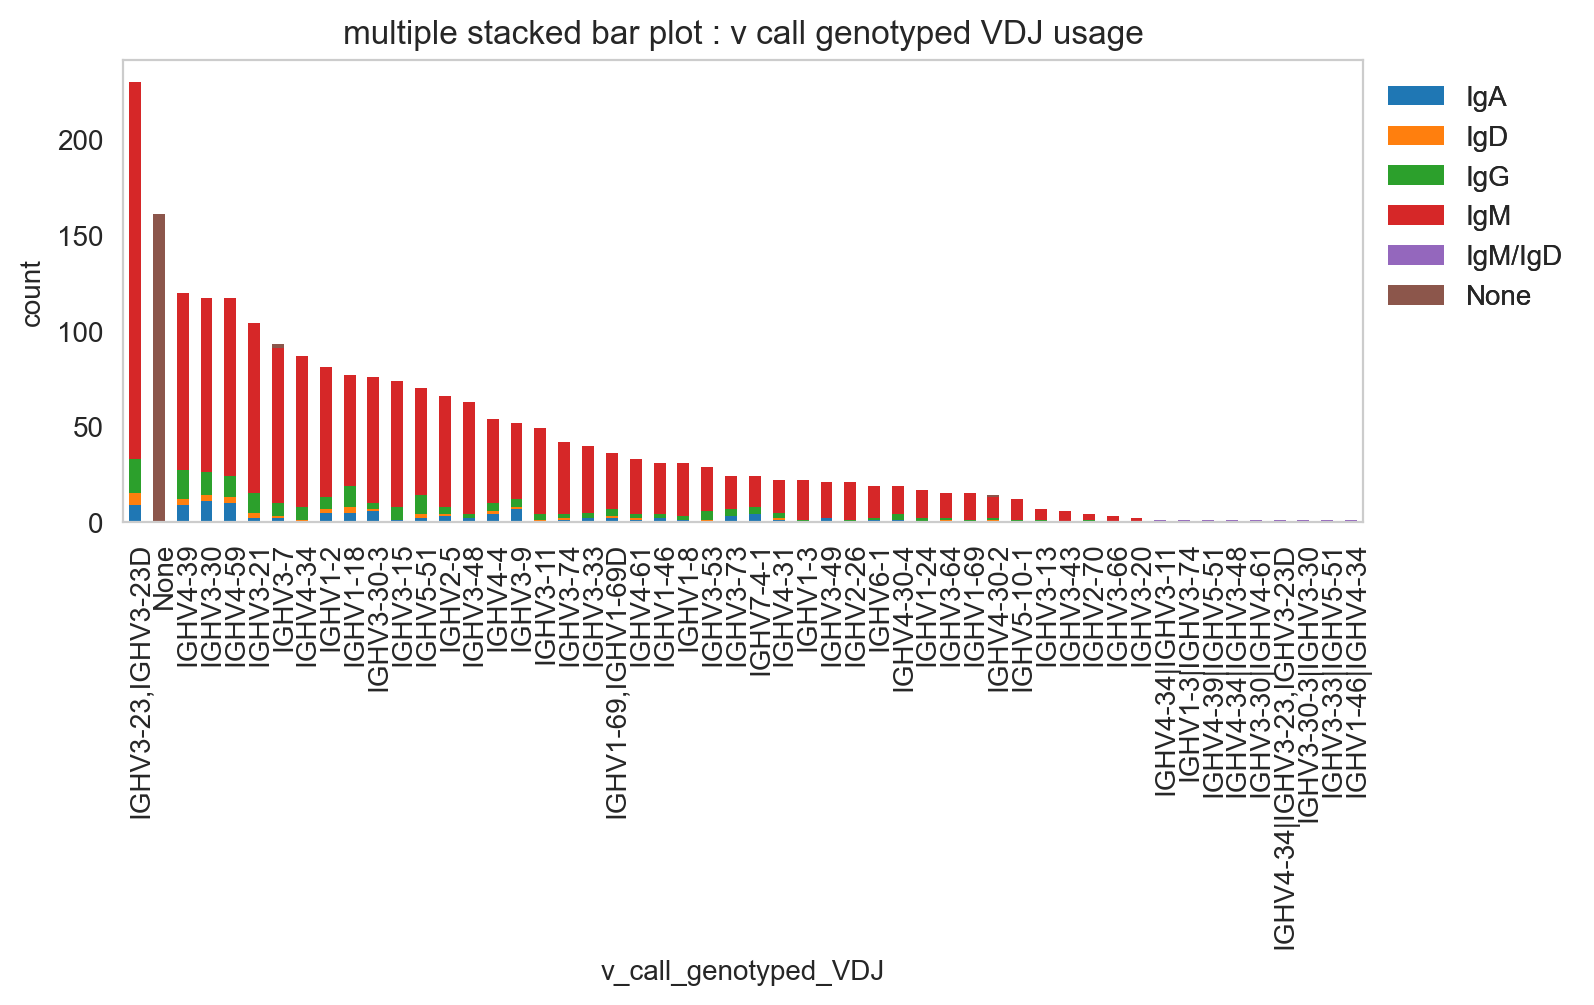

In [20]:
fig, ax = ddl.pl.stackedbarplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="v_call_genotyped_VDJ",
    groupby="isotype_status",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()


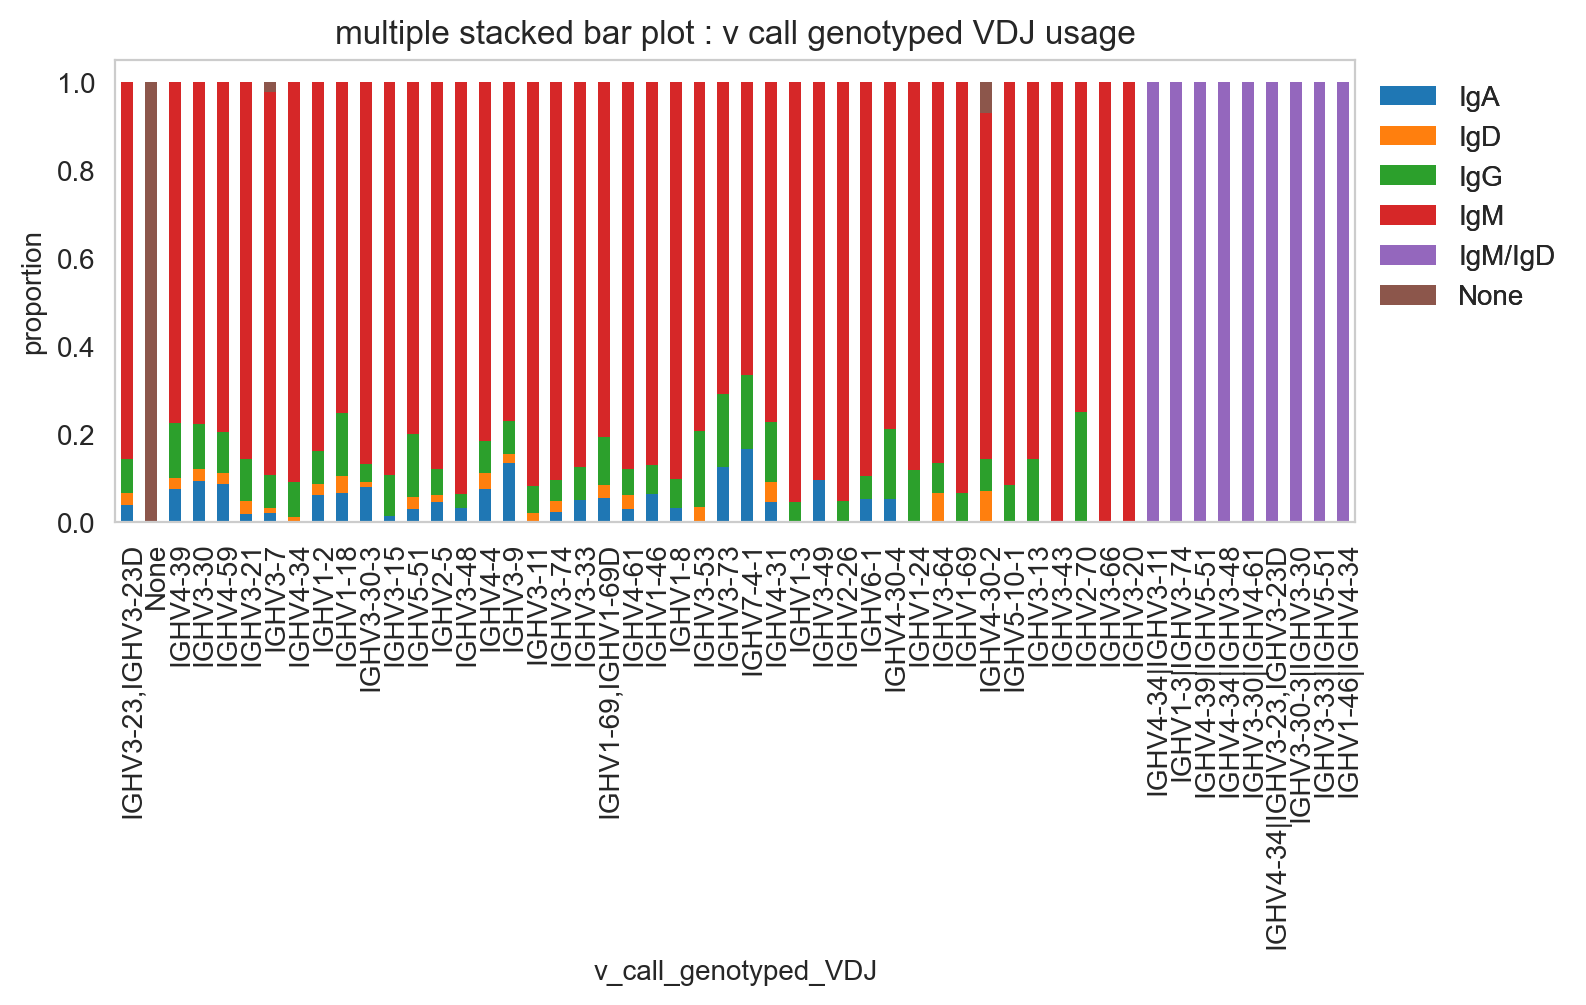

In [21]:
ddl.pl.stackedbarplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="v_call_genotyped_VDJ",
    groupby="isotype_status",
    normalize=True,
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()


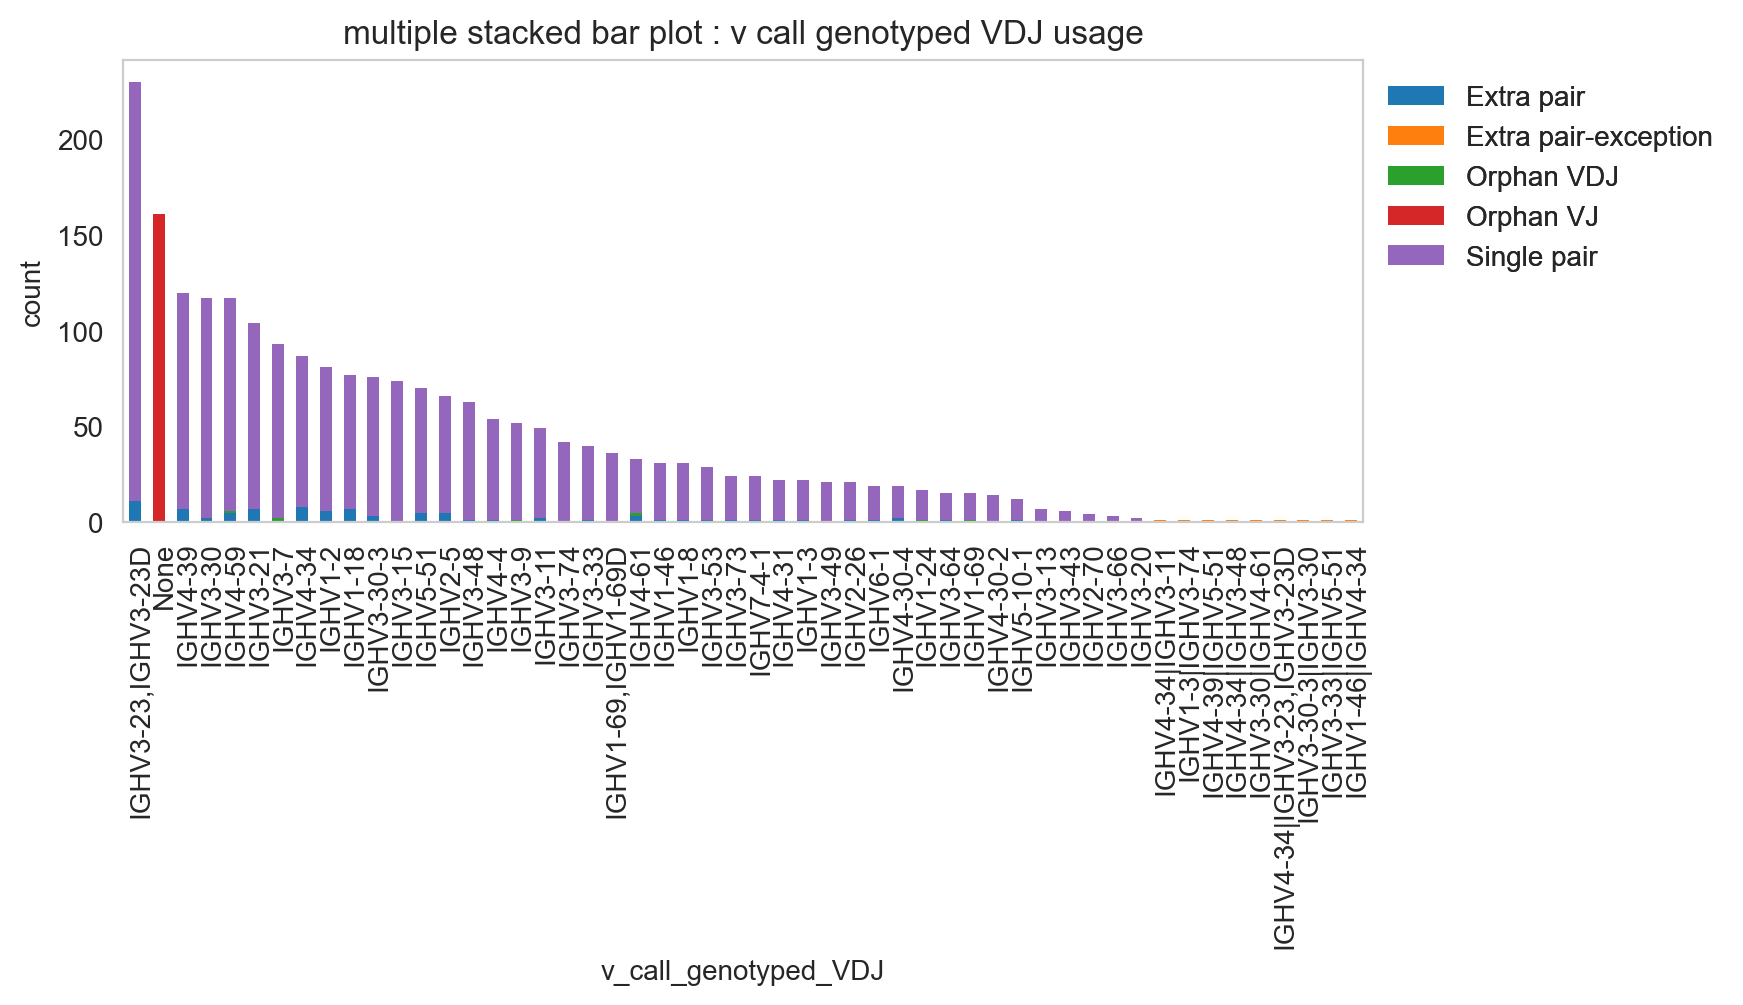

In [22]:
fig, ax = ddl.pl.stackedbarplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="v_call_genotyped_VDJ",
    groupby="chain_status",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

It's obviously more useful if you don't have too many groups, but you could try and plot everything and jiggle the legend options and color.

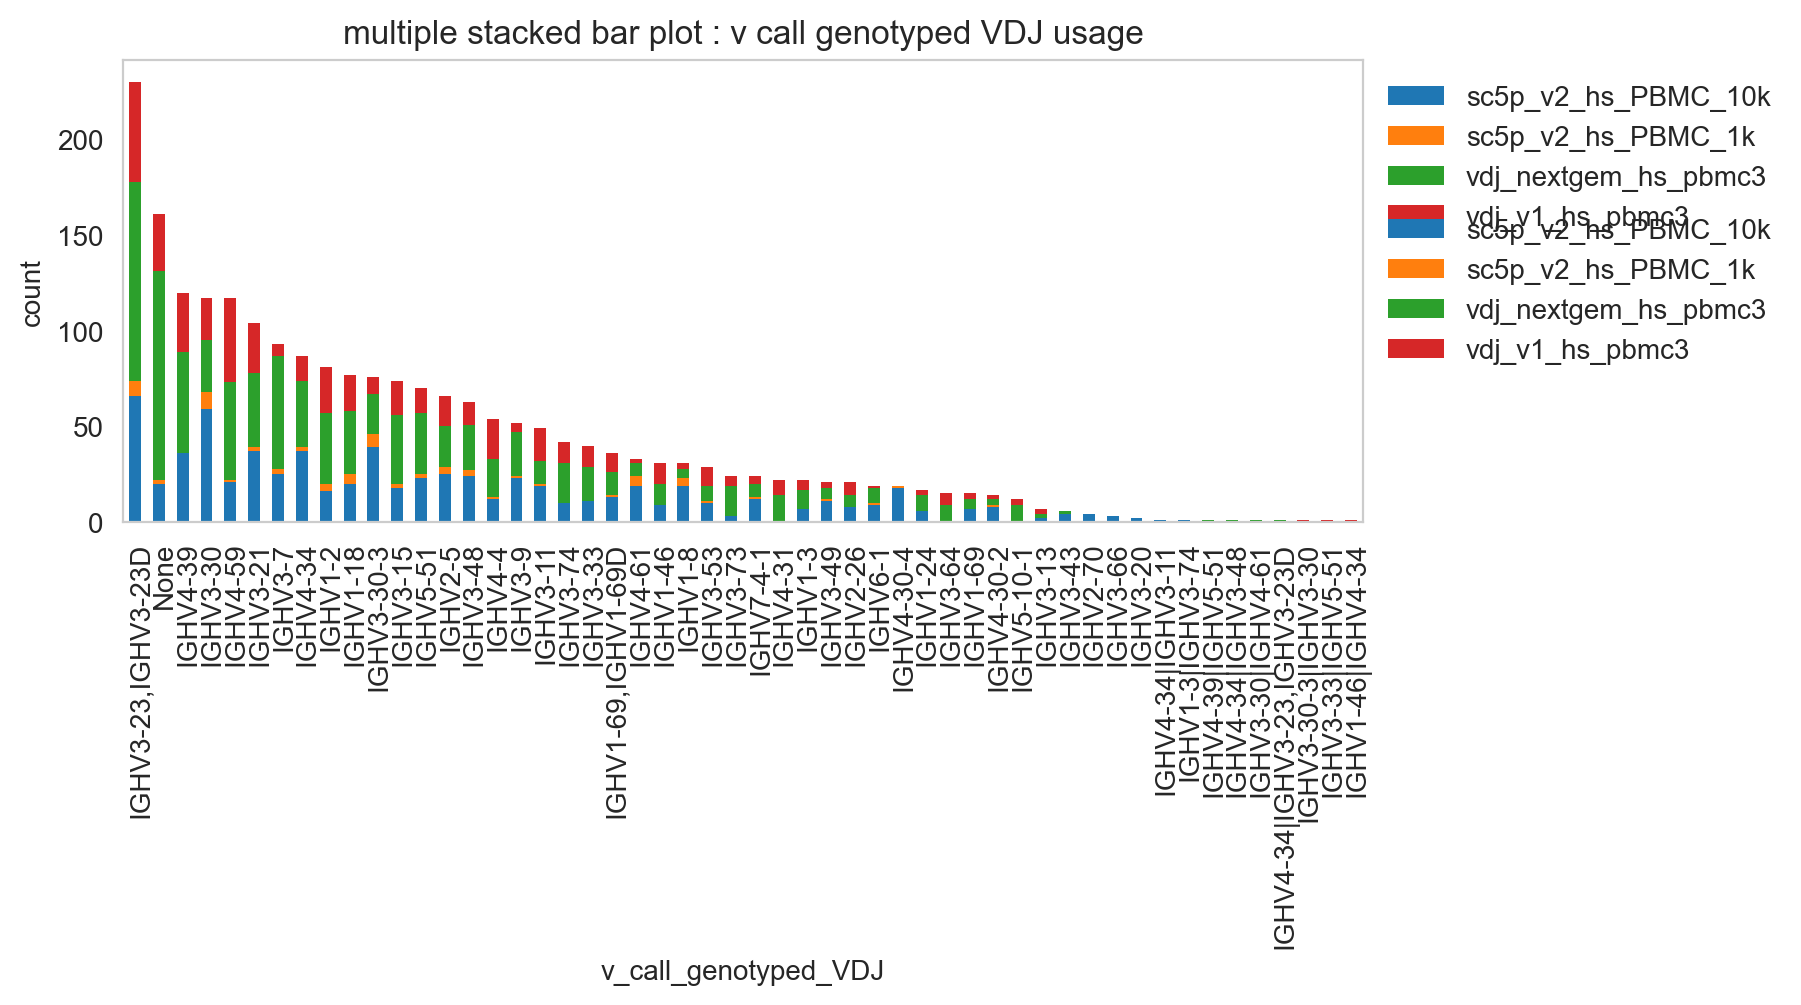

In [23]:
fig, ax = ddl.pl.stackedbarplot(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="v_call_genotyped_VDJ",
    groupby="sample_id",
)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

### `ddl.pl.spectratype`
Spectratype plots contain info displaying CDR3 length distribution for specified groups. For this function, the current method only works for `dandelion` objects as it requires access to the contig-indexed *.data* slot.

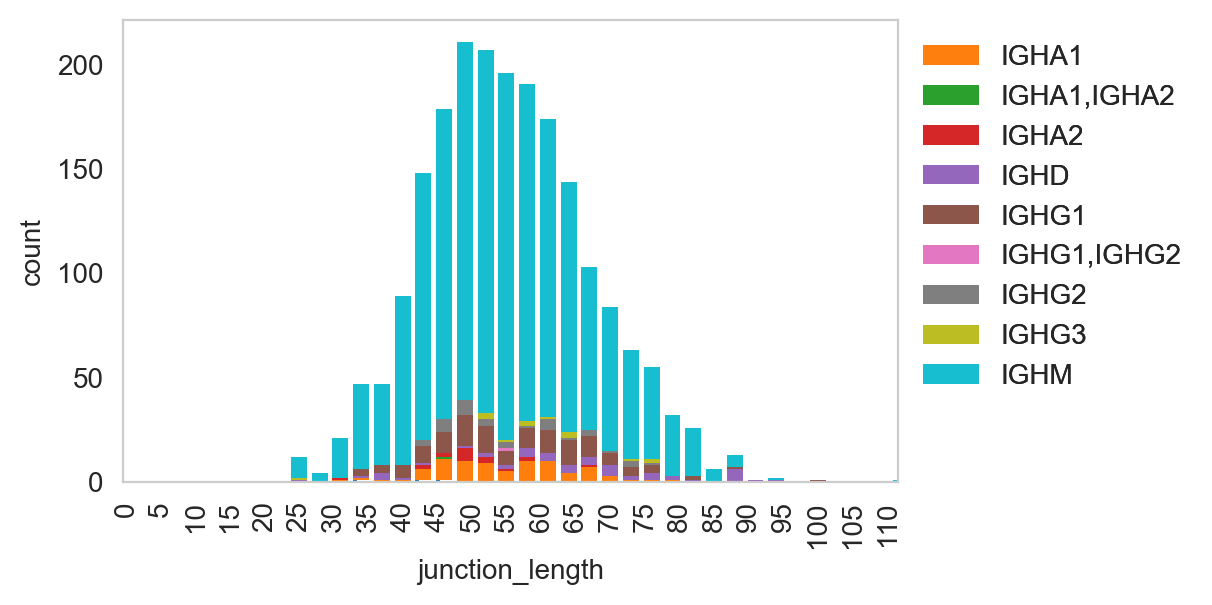

In [24]:
fig, ax = ddl.pl.spectratype(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="junction_length",
    groupby="c_call",
    locus="IGH",
    width=2.3,
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()


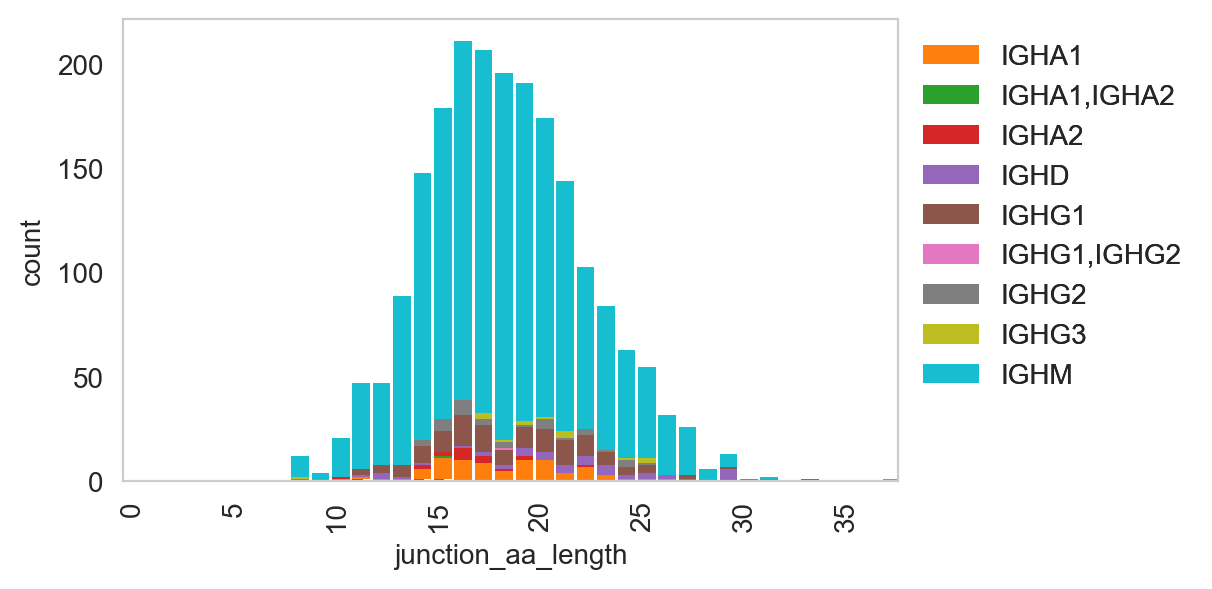

In [25]:
fig, ax = ddl.pl.spectratype(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="junction_aa_length",
    groupby="c_call",
    locus="IGH",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()


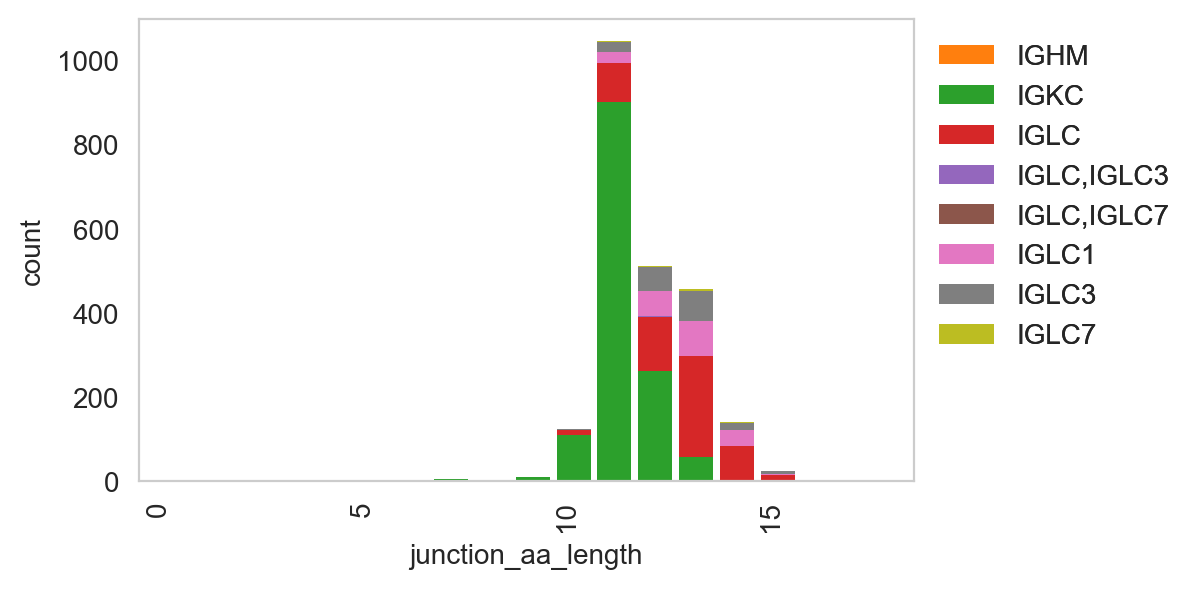

In [26]:
fig, ax = ddl.pl.spectratype(
    vdj[vdj.metadata.isotype_status != "Multi"],
    color="junction_aa_length",
    groupby="c_call",
    locus=["IGK", "IGL"],
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()


### `ddl.pl.clone_overlap`
There is now a circos-style clone overlap function where it looks for whather different samples share a clone. If they do, an arc/connection will be drawn between them.

In [27]:
ddl.tl.clone_overlap(adata, groupby="leiden")


Finding clones
 finished: Updated AnnData: 
   'uns', clone overlap table (0:00:00)


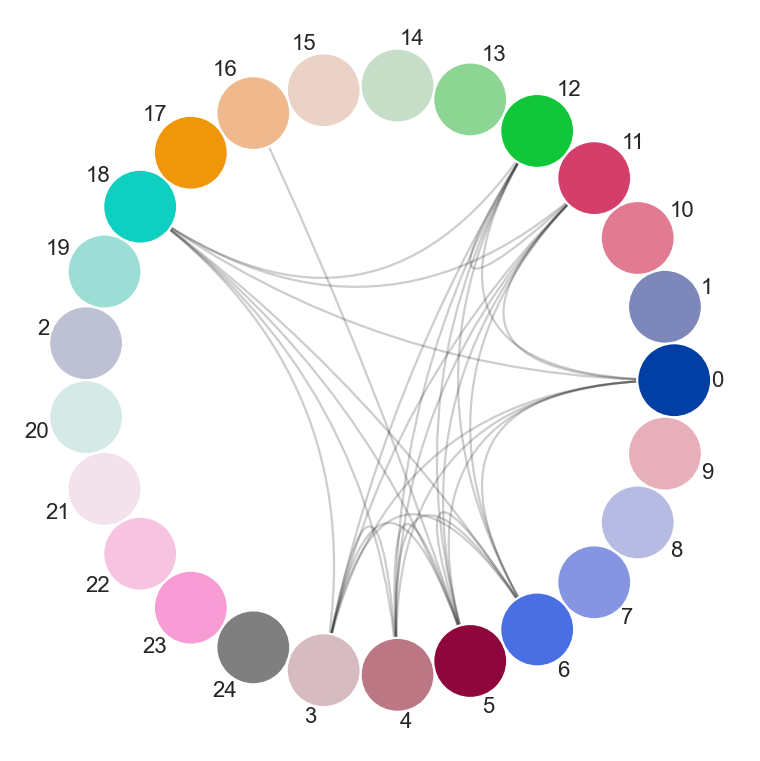

In [28]:
sc.set_figure_params(figsize=[6, 6])
ddl.pl.clone_overlap(adata, groupby="leiden")
plt.show()


Other use cases for this would be, for example, to plot nodes as individual samples and the colors as group classifications of the samples. As long as this information is found in the `.obs` column in the `AnnData`, or even `Dandelion.metadata`, this will work.

You an also specify `weighted_overlap = True` and the thickness of the edges will reflect the number of cells found to overlap between the nodes/samples.

Finding clones
 finished: Updated AnnData: 
   'uns', clone overlap table (0:00:00)


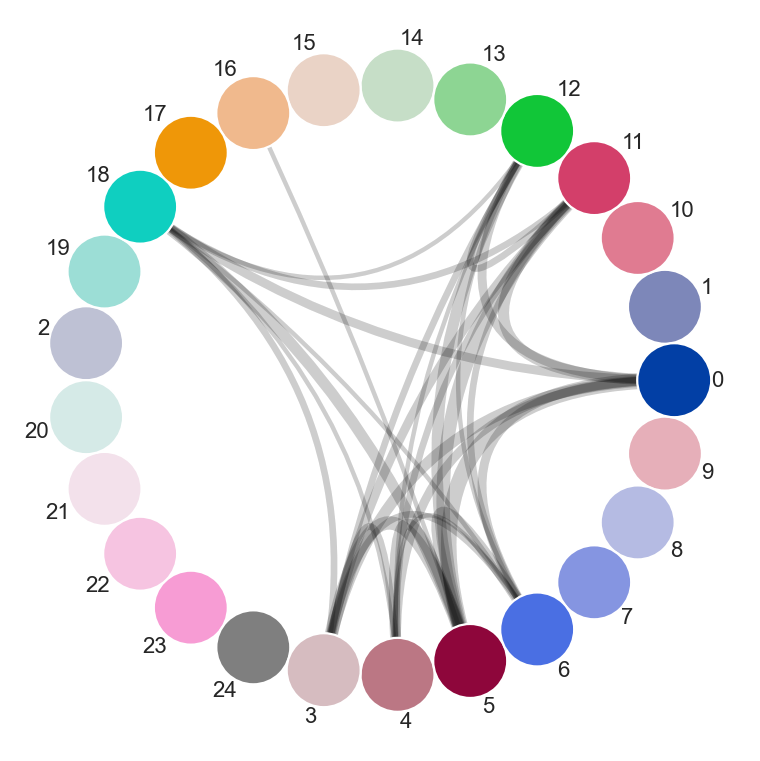

In [29]:
ddl.tl.clone_overlap(adata, groupby="leiden", weighted_overlap=True)
ddl.pl.clone_overlap(adata, groupby="leiden", weighted_overlap=True)
plt.show()


You can also specify `colorby` option. For example, if you provide a combined column to `groupby`, like `group_leiden`, you can specify `group`, `leiden` or `group_leiden` to `colorby`. Experiment around to see the different behaviour!

You can also visualise this as a heatmap by specifying `as_heatmap = True`.

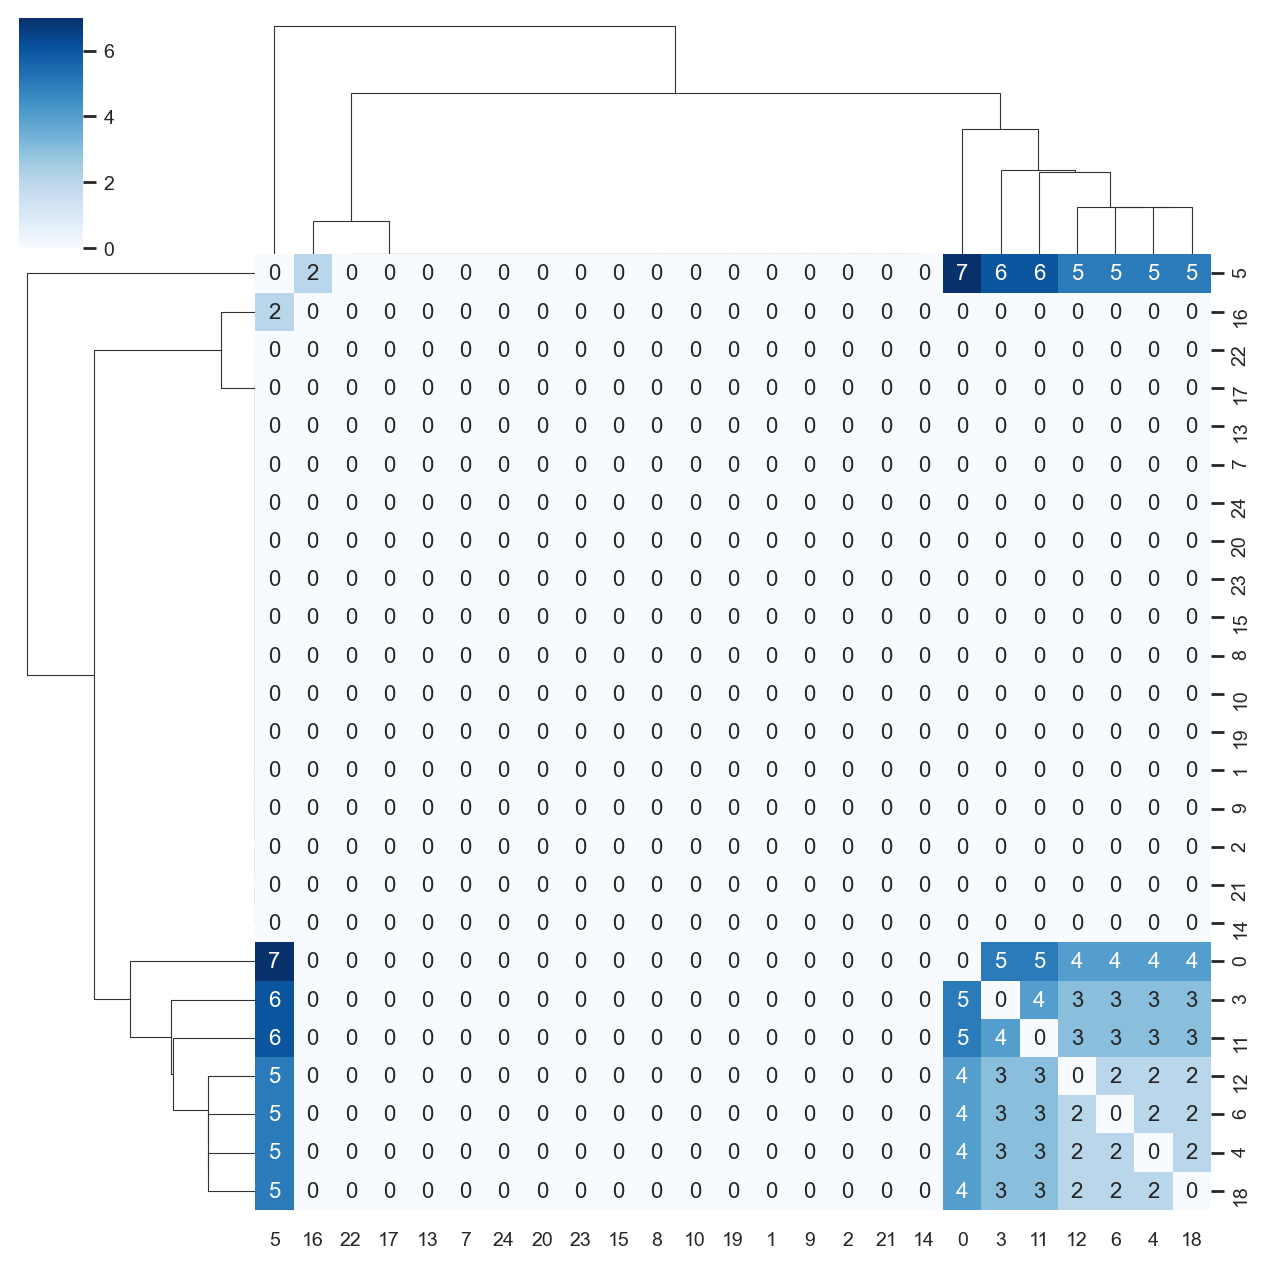

In [30]:
import seaborn as sns

sns.set(font_scale=0.8)

ddl.pl.clone_overlap(
    adata,
    groupby="leiden",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 10},
)
plt.show()


Note: `colorby` option with `as_heatmap=True` doesn't do anything.

### `tl.vj_usage_pca`

You can also compute the V/J gene usage in your various groups of interest. This function will return a new `AnnData` where instead of `cells` (obs) by `gene` (var), it will be `groupby` (obs) by `V/J genes` (var).

For example, I'm interested if the leiden clusters within each donor's sample use V/J genes differently:

In [33]:
# first make a concatenated group
adata.obs["sampleid_leiden"] = [
    s + "_" + l for s, l in zip(adata.obs["sampleid"], adata.obs["leiden"])
]
new_adata = ddl.tl.vj_usage_pca(
    adata,
    groupby="sampleid_leiden",
    mode="B",  # because B cells, use abT and gdT for alpha-beta and gamma-delta T cells respectively
    transfer_mapping=[
        "sampleid",
        "leiden",
    ],  # this transfers the sample_id and leiden values separately. if not provided, only sample_id_leiden is transferred.
    n_comps=3,  # 3 because the example is small here. the default is set at 30
)
new_adata


Computing PCA for V/J gene usage
computing PCA
    with n_comps=3
    finished (0:00:00)
 finished: Returned AnnData: 
   'obsm', X_pca for V/J gene usage (0:00:00)


AnnData object with n_obs × n_vars = 4 × 119
    obs: 'cell_type', 'cell_count', 'sampleid', 'leiden'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

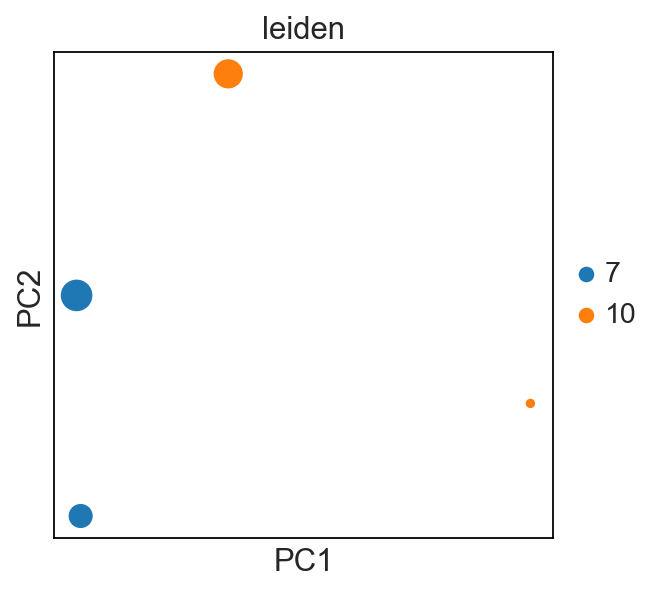

In [34]:
sc.set_figure_params()

sc.pl.pca(new_adata, color="leiden", size=new_adata.obs["cell_count"])
# each dot is a `sample_id_leiden`. Check the .obs


### `tl.productive_ratio`/`pl.productive_ratio`

This new function lets you quantify what is the distribution of productive versus non-productive contigs at a cell-level. To do this, we need to re-check the `Dandelion` object so that non-productive columns are not removed.

In [35]:
vdj2, adata2 = ddl.pp.check_contigs(vdj, adata, productive_only=False)


Filtering contigs


Preparing data: 7357it [00:00, 8645.05it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 3158/3158 [00:07<00:00, 433.47it/s]                                                         

Initializing Dandelion object


Transferring network
 finished: updated `.obs` with `.metadata`
 (0:00:00)
 finished: Returning Dandelion and AnnData objects: 
 (0:00:09)


In [36]:
ddl.tl.productive_ratio(adata2, vdj2, groupby="leiden", locus="IGK")


Tabulating productive ratio
 finished: Updated AnnData: 
   'uns', productive_ratio (0:00:00)


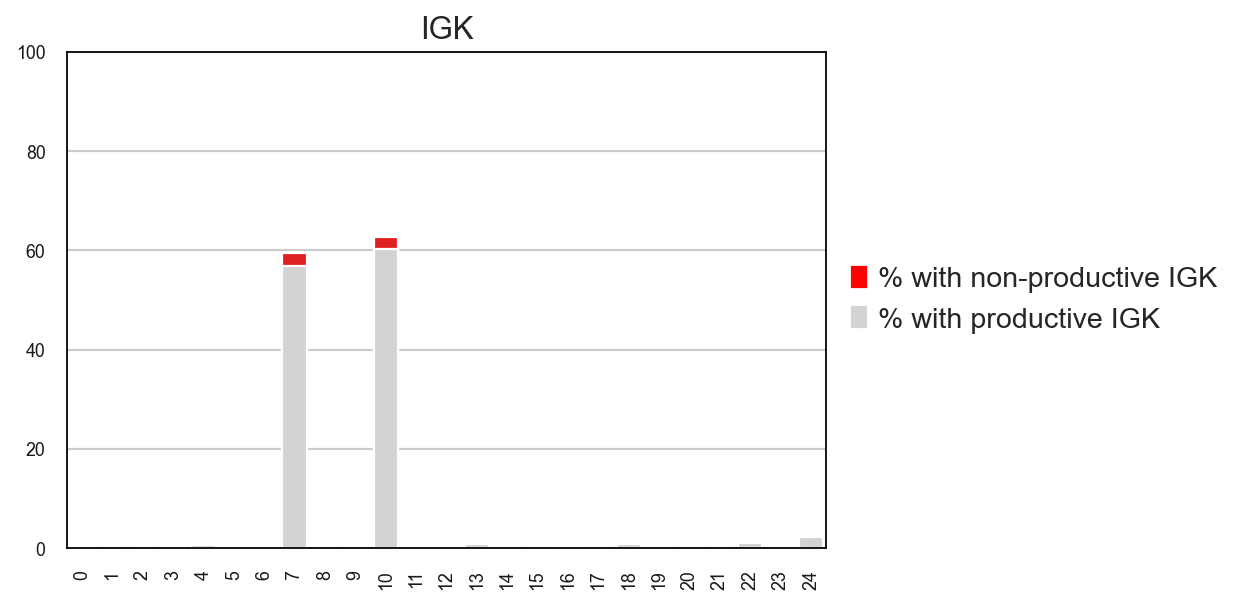

In [37]:
ddl.pl.productive_ratio(adata2, palette=["red", "lightgrey"])
plt.tight_layout()
# plt.savefig('plot.pdf')
plt.show()
